In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [2]:
data = sio.loadmat('../../data/external/LVsVersusSubtendedAngle.mat')
clean_dict = {'lv': np.squeeze(data['LVs']), 'resp_angle': np.squeeze(data['subtendedAngleAtResponse'])}
expm_df = pd.DataFrame(clean_dict)

In [3]:
expm_data = np.concatenate((clean_dict['resp_angle'], clean_dict['lv'])).reshape((1, 492))
expm_lvs = expm_data[0, 246:]
lv_bins = [(0.1, 0.28), (0.28, 0.47), (0.47, 0.65), (0.65, 0.83), (0.83, 1.01), (1.01, 1.2)]
expm_thetas = expm_data[0, 0:246]
qnt_list = []
for lv_low, lv_high in lv_bins:
    mask = (lv_low < expm_lvs) & (expm_lvs < lv_high)    
    qnt_list.append(np.percentile(expm_thetas[mask], [10, 30, 50, 70, 90]))

[23.02725804 29.83354205 43.72151885 58.89128951 89.26556846]
[25.51508594 28.48711815 36.87262129 43.1639435  53.46295928]
[24.66017341 28.09704417 33.24541152 35.66023463 54.16565805]
[24.53809532 31.09471964 34.15554788 40.91643343 69.75778503]
[21.63151675 28.13808316 34.34001041 44.87582892 79.00534935]
[24.5123124  31.0309642  33.28696171 44.59086078 97.62570048]


In [4]:
lv_centers = np.array([0.19, 0.38, 0.56, 0.74, 0.92, 1.11])

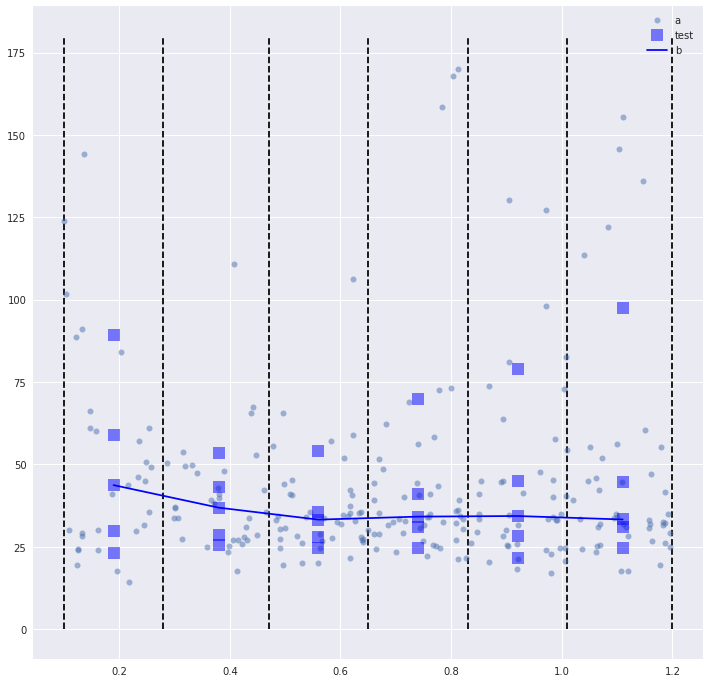

In [41]:
qnt_array = np.array(qnt_list)
sns.set()
lv_bin_bounds = np.array([lv_bin[0] for lv_bin in lv_bins])
lv_bin_bounds = np.concatenate((lv_bin_bounds, [1.2]))
plt.figure(figsize=(12,12))
hdata = plt.plot(expm_df['lv'], expm_df['resp_angle'], ls='', marker='.', ms=12, alpha=0.5)
quants = plt.plot(lv_centers, qnt_array, 'sb', ms=12, alpha=0.5, label='bla')
hmed = plt.plot(lv_centers, qnt_array[:, 2], 'b', label='aaef')
plt.legend([hdata[0], quants[0], hmed[0]], ['a', 'test', 'b'])

plt.vlines(lv_bin_bounds, 0, 180, linestyles='--')

In [27]:
lgd.

In [22]:
quants[0]